Este colab fue desarrollado por Arnold Charry Armero

# Manufacturing Company

Una empresa manufacturera produce dos tipos de
productos: A y B. La empresa se ha comprometido a entregar el
productos en el cronograma que se muestra en la Tabla 34. La empresa
Dispone de dos líneas de montaje, 1 y 2, con la disponible
horas de producción que se muestran en la Tabla 35. Las tasas de producción
para cada línea de montaje y combinación de productos, en términos de horas por producto, se muestran en la Tabla 36. Se necesitan 0,15 horas
para fabricar 1 unidad del producto A en la línea 1, y así sucesivamente. Él
Cuesta $5 por hora de tiempo de línea para producir cualquier producto. El
El costo de mantenimiento de inventario por mes para cada producto es de 20 centavos.
por unidad (cargado sobre el inventario final de cada mes).
Actualmente, hay 500 unidades de A y 750 unidades de B en
inventario. La gerencia desearía al menos 1.000 unidades de
cada producto en inventario a finales de abril. Formular un
LP para determinar el programa de producción que minimice el
Costo total incurrido para satisfacer las demandas a tiempo.

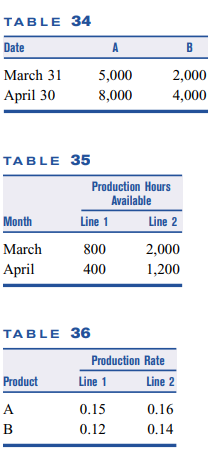

#Conjuntos

$ t = \text{Tiempo indexado por } t$

$ j = \text{Linea indexado por } j$

# Parámetros

$C_{tj} = \textrm{Costo de producir en la línea } j \textrm{ en el tiempo } t \textrm{ para el producto A }$

$CP_{tj} = \textrm{Costo de producir en la línea } j \textrm{ en el tiempo } t \textrm{ para el producto B }$

$ CI_{t} = \textrm{Costo de mantener en inventario una unidad } t $

$ HA_{tj} = \textrm{Tiempo de producción del producto A en el tiempo  } t \textrm{ de la línea } j$

$ HB_{tj} = \textrm{Tiempo de producción del producto B en el tiempo  } t \textrm{ de la línea } j$

$ HM_{tj} = \textrm{Horas máximas por cada producto A producido en la línea } j \textrm{ en el tiempo } t$

$ HMM_{tj} = \textrm{Horas máximas por cada producto B producido en la línea } j \textrm{ en el tiempo } t$

$ a_{t} = \textrm{Demanda de productos a en el tiempo }  t$

$ b_{t} = \textrm{Demanda de productos b en el tiempo }  t$




## Variables de decisión

$ A_{tj} = \textrm{unidades a producir de producto A en el periodo } t \textrm{ con la línea } j$

$ B_{tj} = \textrm{unidades a producir de producto B en el periodo } t \textrm{ con la línea } j$

$ I_{t} = \textrm{unidades a mantener en inventario en el periodo para el producto a en } t$

$ J_{t} = \textrm{unidades a mantener en inventario en el periodo para el producto b en } t$

## Función objetivo

$$ \textrm{Min } z = \sum_{j = 1}^{n}\sum_{t = 1}^{n}A_{tj} C_{tj} + B_{tj} CP_{tj} + \sum_{t = 1}^{n} I_{t}CL_{t} + J_{t}CL_{t}$$

Se debe satisfacer la demanda en cada periodo $t$

$$ I_{t} = I_{t-1} + \sum_{j = 1}^{n} A_{tj} - a_{t}, \forall t $$

$$ J_{t} = J_{t-1} + \sum_{j = 1}^{n} B_{tj} - b_{t}, \forall t $$

El inventario debe ser mayor o igual a 1000 al final del mes,

$$ I_{2} \geq 1000 $$

$$ J_{2} \geq 1000 $$

No se pueden rebasar las horas que se tiene en cada línea

$$ A_{tj} HA_{tj} \leq HM_{tj}, \forall t, \forall j$$

$$ B_{tj} HB_{tj} \leq HMM_{tj}, \forall t, \forall j$$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 20.2 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [9]:
#Conjuntos
periodos = range(3)
lineas = range(2)

In [10]:
#Parámetros

C = [[0.75, 0.8], [0, 0]]

CP = [[0, 0], [0.6, 0.7]]

CI = [0.2, 0.2]

HA = [[0.15, 0.16], [0, 0]]

HB = [[0, 0], [0.12, 0.14]]

HM = [[800, 2000], [0, 0]]

HMM = [[0, 0], [400, 1200]]

a = [5000, 8000]

b = [8000, 4000]

In [14]:
#Se crea la instancia del modelo
model = LpProblem(name = "Manufacturing_Company", sense = LpMinimize)

#Inicialización de las variables de decisión
A = LpVariable.dicts("A", (periodos, lineas), 0, None, LpInteger)
B = LpVariable.dicts("B", (periodos, lineas), 0, None, LpInteger)
I = LpVariable.dicts("I", (periodos), 0, None, LpInteger)
J = LpVariable.dicts("J", (periodos), 0, None, LpInteger)

#Se agrega la función objetivo
model += lpSum([[A[t][j] * C[t-1][j] + B[t][j] * CP[t-1][j] for t in range(1, 3)] for j in lineas]) + lpSum([I[t] * CI[t-1] for t in range(1, 3)]) + lpSum([J[t] * CI[t-1] for t in range(1, 3)])

#Restricciones

#Debe haber un inventario inicial
model += I[0] == 500
model += J[0] == 750
model += A[0][0] == 0
model += B[0][0] == 0

#Tiene que satisfacerse el inventario
for t in range(1, 3):
  model += I[t-1] + A[t][0] + A[t][1] - a[t-1] == I[t]

for t in range(1, 3):
  model += J[t-1] + B[t][0] + B[t][1] - b[t-1] == J[t]

model += I[2] >= 1000
model += J[2] >= 1000

#No se pueden rebasar las horas
for t in range(1, 3):
  for j in lineas:
    model += A[t][j] * HA[t-1][j] <= HM[t-1][j]
    model += B[t][j] * HB[t-1][j] <= HMM[t-1][j]

#Se resuelve el modelo
model.solve()

#Se imprime el status del problema
print("Status", LpStatus[model.status])

#Se imprimen las variables
for v in model.variables():
  print(v.name, "=", v.varValue)

#Se imprime la función objetivo
print("Costo total =", value(model.objective))

Status Optimal
A_0_0 = 0.0
A_1_0 = 4500.0
A_1_1 = 0.0
A_2_0 = 9000.0
A_2_1 = 0.0
B_0_0 = 0.0
B_1_0 = 12250.0
B_1_1 = 0.0
B_2_0 = 0.0
B_2_1 = 0.0
I_0 = 500.0
I_1 = 0.0
I_2 = 1000.0
J_0 = 750.0
J_1 = 5000.0
J_2 = 1000.0
Costo total = 4775.0
